# JWT
## Self-Contained vs Reference Token
- `Self-contained tokens`: tokens that contain all the necessary information within the token itself. JWT is a popular implementation(JWT). The receipent of the self-contained token can validate the token by checking the signature, expected user name and expected audience or scope.
- `Reference tokens`(opaque tokens): tokens that are unique identifiers representing the user's authentication, but do not contain any verifiable metadata or claims themselves. Instead, the recipient must query the authorization server or a token introspection endpoint to extract information about the token, including the user's identity and the token's validity.

## JWT
JWTs are self contained tokens that contains all the necessary information to validate the token. This information includes
- token expiration time
- the issuer
When a token is presented to a server the server can validate it by checking the token's signature and claims without needing to reference the state stored in a database. This is different from stateful sessions where each request needs to be asociated session data on the server.

1. `No Server-side Session`: Since each request carries a token that contains all the necessary data to handle that request, the server does not need to maintain a session state for each user. This reduces server memory requirements and simplifies scalability because each request is independent of others.
2. `Scalability`: Stateless authentication scales better in environments where requests are distributed across multiple servers or in microservices architectures. Since the authentication state is contained in the token itself therer is no need to share sessions or user state between differe servers or services.
3. `Use of Refresh Tokens`: Even through the user of refresh tokens may seem to introduce a state (since they can be strored in a database to track their validity), theri primary purpose is to safely issue new tokens. The overall process remains stateless from the perspective of handling individual API requests. The server can verify the refresh token's validity and issue a new access token without maintaining a continuous session. This is especially rlevent if you implement token revocation or expiration mechanisms that might require checking a list or a database, but the typical operations driven by access tokens remain stateless.
4. `Revocation Lists`: If you use a revocation list to invalidate tokens (either access or refresh tokens), it introduces a stateful element into an otherwise stateless architecture. However, the core concept of JWT functioning remains stateless unless every request needs to check this list, which would effectively make it stateful.


# HMAC
HMAC (Hash-based Message Authentication Code) is a method used for creating a message authentication code (MAC) involving a cryptographic hash function and a secret cryptographic key. In the context of JWT, HMAC is used to ensure the integrity and authenticity of the token.

## JWT
A JSON Web Token (JWT) is composed of 3 parts, separated by dots (`.`):
1. Header
2. Payload
3. Signature

### Header
- The header typically consists of 2 parts: the type of the token, which is JWT, and the signing algorithm being used such as HMAC SHA256 or RSA.
```
{
    "alg": "HS256",
    "typ": "JWT"
}
```
- This JSON is then Base64Url encoded to form the first part of the JWT.

### Payload
- The payload contains the claims. Claims are statements about an entity (typically, the user) and additional data. There are 3 types of claims:
- 1. registered
  2. public
  3. private

#### Registered Claims
These are a set of predefined claims which are not mandatory but recommended to rpovide a set of useful, interoperable claims. Some of the registered claims include:
- `iss` (issuer): Identifies the principal that issued the JWT.
- `sub` (subject): Identifies the principal that is the subject of the JWT.
- `aud` (audience): Identifies the recipients tahthe JWT is intended for.
- `exp` (expiration time): Identifies the expiration time on or afte which the JWT must not be accepted for processing.
- `nbf` (not before): Identifies the time before which the JWT must not be accepted for processing.
- `iat` (issued at): Identifies the time at which the JWT was issued.
- `jti` (JWT ID): Provide a unique identifier for the JWT.

#### Public Claims
These are claims taht can be defined at will by using JWTs. However, to avoid collisions, they should be defined in the [IANA JSON Web Token Registry](https://www.iana.org/assignments/jwt/jwt.xhtml) or be namespaced.

#### Private Claims: 
These are the custom claims created to share information between parties and agree on using them and are not intended to be shared outside of that context.

Example of a Payload
```
{
    "sub": "1234567890",
    "name": "John Doe",
    "iat": 1516239022
}
```
- `sub`(subject): A regiestered claim indicating the subject of the token (typically, the user ID).
- `name`: A public claim indicating the name of the user.
- `iat`(issued at): A registered claim indicating the time at which the token was issued.

### Signature
To create a signature, you have to take the encoded header, the encoded payload, a secret key, and the algorithm specified in the header. The signature is used to verify that the sender of the JWT is who it says it is and to ensure that the message wasn't changed along the way.

For example, if you want to use the HMAC SHA256 algorithm, the signature will be created as follows
```
HMACSHA256(
    base64UrlEncode(header) + "." + base64UrlEncode(payload),
    secret
)
```

pu

### Base64UrlEncode
In JWT, the header, payload, siganature are Base64UrlEncoded.

The difference between Base64 encoding and Base64Url encoding:
- Base64 Encoding uses:
- - `+` (plus) for the 62nd character
  - `-` (slash) for the 63rd charater
  - `+` (equals) for baddding
- Base64Url Encoding uses:
- - `-` (hyphen) instead of `+`
  - `_` (underscore) instead of `/`
  - No padding (`=` is obmitted)

The JWT token is formed when you cancatenated with dots (`.`) the base64url encoded header, payload and signature.
```
<header>.<payload>.<signature>
```

## How HMAC Works in JWT
When you use HMAC for JWT, it provides  a way to verify that the token has not been tampered with and that it is authentic. How does it verify the token hasn't been compromised.
1. Header and Payload:
- - The JWT consists of 3 parts:
  - - Header
    - Payload
    - Signature
1. Creating the Signature:
- - The payload contains the claims, which are statements about an entity (typically, the user) and additional data.
  - The signature is created by combingin the encoded header, the encoded payload, and a secret key usesing the specified hashing algorithm.
  - The process of creating a JWT signature using HMAC is as follows:
```
HMACSHA256(
    base64UrlEncode(header) + "." + base64UrlEncode(payload),
    secret
)
```
3. Token Generation:
- - The resulting JWT is a string consisting of the encoded header, the encoded payload, and the signature, separated by dots('.');
```
<url46urlencoded-header>.<url46urlencoded-payload>.<url46urlencoded-signature>
```
4. Verifying the Token:
- - When the server receives a JWT, it verifies the token by recomputing the signature using the header and payload along with the secret key, and then comparing it to the signature included in the token.
  - If the signature match, the token is valued and can be trusted. If not, the token is invalid or has been tampered with.

### JWT Verification Process
1. Server recieves the JWT:
```
<url46urlencoded-header>.<url46urlencoded-payload>.<url46urlencoded-signature>
```
2. Extract the Components:
- - url46urlencoded-header
  - url46urlencoded-payload
  - url46urlencoded-signature
3. Decode the header and payload
Decode the header and payload to their JSON form
4. Base64url encode header and payload, then recompute the signature using the encoded header, payload, and the secret key.
```
recomputed_signature = HMACSHA256(
                            base64UrlEncode(header) + "." + base64UrlEncode(payload),
                            secret
                        )
```
5. Compare the Signatures:
- - Base64Url encode the recomputed signature
  - Compare the computed signature with the signature extracted from the JWT
  - If they match, the token is valid
  - If they do not match, the token is invalid and has been tampered with.

JWT(JSON Web Token) authentication works through a series of steps that securely transmit user information between the client and server.

## JWT Authentication Flow

1. User Login And JWT Creation:
- - The user submits their login credentials (username and password) to the authentication server via a login endpoint.
  - The server checks if the provided credentials match the records in the database.
  - - If the credentials are valid server creates a JWT
    - Otherwise returns an error
2. Token Distribution
- - The server sends the JWT back to the client, typically in the response body as a HTTP-only cookie.
3. Token Storage:
- - The client stores the token in localStorage, sessionStorage, or cookies (preferably HTTP-only cookies for security reasons).
4. Accessing Protected Routes:
- - For accessing protected routes or resources, the client sends the JWT in the Authorization header using the Bearer schema:
```
Authorization: Bearer <token>
```
4. Server Validates JWT:
- - The server receives the request and extracts the token from the Authorized header.
- - The server verifies the token's signature using the secret key.
  - - If the token is valid, expiration time is valid, other claims are valid (e.g., user roles or permissions), the server process the request.
    - Otherwise, rejects the request.

In [7]:
%%bash
pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.1 MB/s eta 0:00:0000:0100:01
  Created wheel for typed-ast: filename=typed_ast-1.5.5-cp312-cp312-macosx_14_0_arm64.whl size=197726 sha256=069cd8730aceb1124e7780c6bd9445d7c2ebc3e9f83e7534ac0c95d5fd17bc5d
  Stored in directory: /Users/yilengyao/Library/Caches/pip/wheels/7d/85/f8/cb309265bf60f840369ca24241385ae985caab44af05272b6a
Successfully built typed-ast


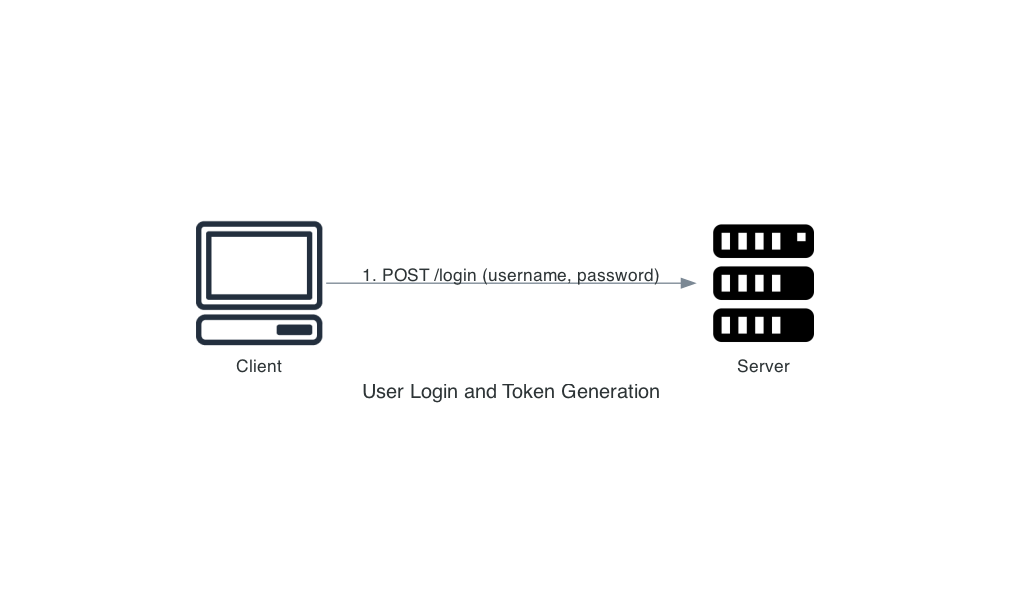

In [35]:
from diagrams import Diagram, Edge
from diagrams.onprem.client import Client
from diagrams.onprem.compute import Server
from IPython.display import Image

with Diagram("User Login and Token Generation", show=False) as diag:
    client = Client("Client")
    server = Server("Server")

    client >> Edge(label="1. POST /login (username, password)") >> server 
diag_path = diag.filename + ".png"
Image(diag_path)

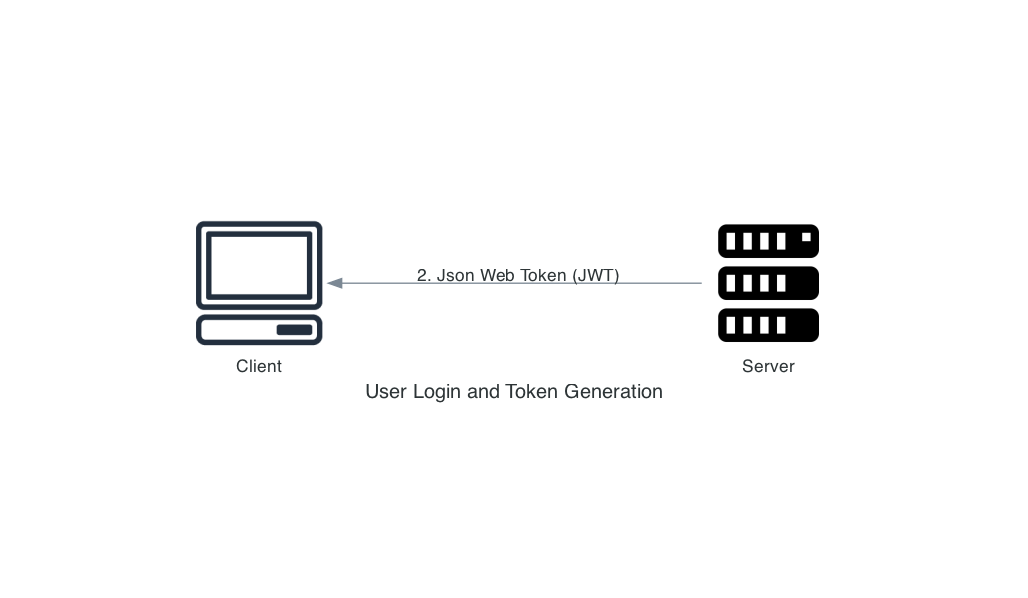

In [44]:
with Diagram("User Login and Token Generation", show=False) as diag:
    client = Client("Client")
    server = Server("Server")

    client << Edge(label="           2. Json Web Token (JWT)         ") << server 
diag_path = diag.filename + ".png"
Image(diag_path)

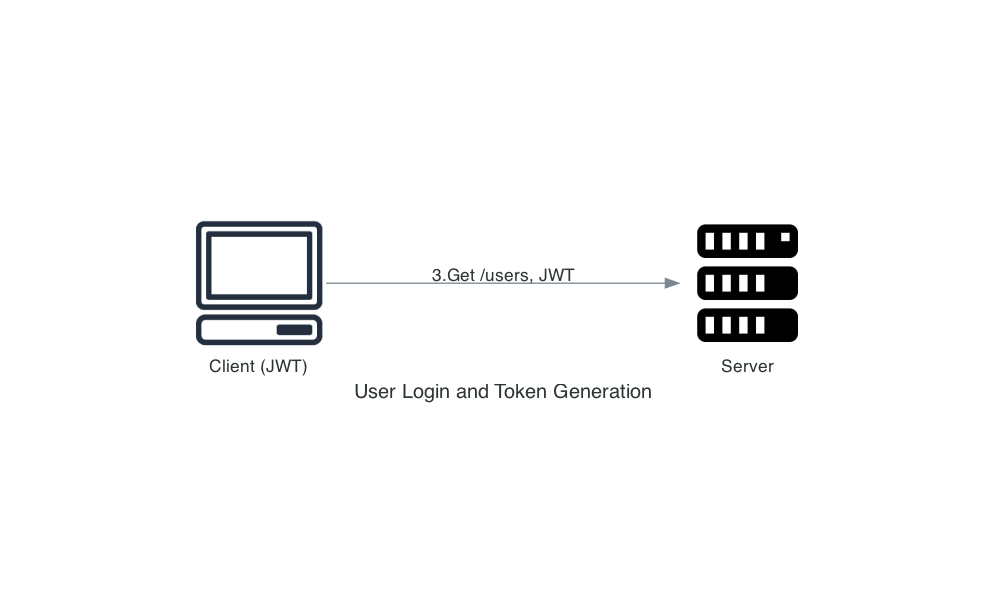

In [45]:
from diagrams import Diagram, Edge
from diagrams.onprem.client import Client
from diagrams.onprem.compute import Server
from IPython.display import Image

with Diagram("User Login and Token Generation", show=False) as diag:
    client = Client("Client (JWT)")
    server = Server("Server")

    client >> Edge(label="              3.Get /users, JWT              ") >> server 
diag_path = diag.filename + ".png"
Image(diag_path)

## Access an Refresh Tokens
Access tokens and refresh tokens are commonly used in authentication and authorization systems to manage user sessions securely. They help maintain security and improve user experience by allowing for seamless session continuation without repeatedly asking users to log in.

### Access Tokens
Access tokens are short-lived tokens that are used to access protected resources. They are typically included in the `Authorization` header of HTTP requests.
- `Lifetime`: Access tokens have a short lifespan (e.g., minutes to hours) to minimize the impact if they are compromised.
- `Usage`: they are used to authenticate and authorize access to APIs and other resources.
- `Validation`: When a client sends a request with an access token ,the server validates the token to ensure it is valid and not expired.

### Refresh Tokens
Refresh tokens are long-lived tokens used to obtain new access tokens without requiring the user to log in again. They are generally stored securely and used sparingly.
- `Lifetime`: Refresh tokens have a longer lifespan (e.g., days to weeks).
- `Usage`: They are used to request new acceess tokens when the current access token expires.
- `Security`: Because refresh tokens are long-lived, they should be stored securely (e.g., HTTP-only cookies) and protected from unauthorized access.

#### Authentication Flow with Access and Refresh Tokens
1. User Login:
- - The user logs in with their credentials (username and password).
  - The server vverifies the credentials.
  - The server generates an access token and a refresh token.
  - The access token and refresh token are sent to the client.
  - The client stores the tokens (e.g., access token in memory or local storage, refresh token in an HTTP-only cookie).
2. Accessing Protected Resources:
- - The client sends request to protected resources, including the access token in the `Authorization` header.
  - The server validates the access token.
  - If the access token is valid, the server processes the request and returns the protected resource.
3. Refreshing Access Tokens:
- - When the access token expires, the client uses the refresh token to request a new access token.
  - The client sends the refresh token to the server.
  - The server validates the refresh token.
  - If the refresh token is valid, the server generates a new access token and sends it to the client.
  - The client replaces the old access token with the new one.

## Bearer Token
A bearer token is a type of access token that grants the bearer access to a protected resource. The name "bearer" implies that any party in procession of the token (the bearer) can use it to access the resource. It is part of the OAuth 2.0 authorization framework and is used to indicate that the client is presenting a token to prove its identity and access rights.

How It Works<br>
When a client makes a HTTP request to access a protected resource, it includes the bearer token in the `Authorization` header. The format is:
```
Authorization: Bearer <token>
```

Eg.
```
GET /protected-resource HTTP/1.1
Host: api.example.com
Authorization: Bearer abc13token
````

In this example, `abc13token` is the access token that the client presents to the server to authenticate itself and gain access to the protected resource.

Characteristics of Bearer Tokens
1. Self-contained: Bearer tokens typically contain all the information needed to authenticate and authorize the client. This information must include the user's identity, token expiration time, and scope of access.
2. Stateless: The server does not need to store session information about t he token. The token itself is sufficient ot determine the client's identity and access rights.
3. Secure Transmission: Bearer tokens must be transmitted over HTTPS to prevent interception and isuse by unauthorized parties.
4. Short-lived: Bearer tokens are ususally short-lived to minimize the risk of misuse if the token is compromised. Longer-lived tokens are typically refreshed using refresh tokens.

Security Considerations<br>
Because the bearer token grants access to the bearer, it is critical to handle bearer tokens securely:
1. Transmit over HTTPS: Always use HTTPS to protect the token during transmission.
2. Secure Storage: Store tokens securely on th client side to prevent unauthorized access.
3. Token Expiry: Implement short token lifetimes nad sue refresh tokens to limit the impact of a compromised token.
4. Scope and Permissions: Limit the scope and permissions of bearer tokens to the minimul necessary for the client's operations.

value vs reference reference token

jwt (value token) is self contained, signed token

do not pass password in payload

## Best Practice for Returning Access/Refresh token to User
The best practice involves returning access tokens in the response body for immediate use and handling refresh tokens via secure, HttpOnly cookies to leverage automatic, secure transmission and storage mechanism provided by the browser. This strategy effectively balance security conceerns with practical application requirements, ensuring both the protection of sensitive data and a seamless user experience.

### Access Tokens
Access tokens are typicially short-lived and used for accessing protected resources. They should be handled carefully to ensure they are secure yet readily available for client-side use:

#### Return Mechanism
- `Response Body`: Access tokens are commonly returned in the JSON response body during the initial authentication process. This allows the client-side application to easily extract and use the token for subsequent API calls.

#### Client-Side Storage:
- `Storage Option`: Depending on the application type, access tokens can be stored in memory, sessionStorage, or localStorage. Each option has different implications for security and lifecycle management.
- - `Memory`: Most secure, as the token is nonly kept in RAM and lost when the page is refreshed or closed, minimizing exposure.
  - `SessionStorage`: Persists only for the session and is cleared when the tab is closed. It's secure against XSS but not shard across tabs.
  - `LocalStorage`: Least secure against XSS attacks as it persists beyond the session and is accessible across tabs.

#### Security Considerations
- Ensure all transmission of the token over the network are secured via HTTPS to prevent MITM attacks.
- Implement robust imput validation and sanitization on the server to prevent injection attacks.

### Refresh Tokens
Refresh tokens are longer-lived and used to obtain net access tokens. Due to their powerful nature and longer lifespan, securing these tokens are crucial.

#### Return Mechanism
- `HttpOnly Secure Cookies`: The most secure method for handling refresh tokens is through HttpOnly, Secure cookes. This approach prevents access to the token via client-side JavaScript, reducing the risk of XSS atttacks, and ensures the token is only sent over HTTPs, protecting against MITM attacks.

#### Cookie Attributes
- `Secure`: Ensures the cookie is only sent over HTTPS.
- `HttpOnly`: Prevents access to the cookie's value through JavaScript.
- `SameSite`: Can be set to `Strict` or `Lax` to mitigate CSRF risks by controlling cross-site request behaviours.

#### Renewal and Rotation
- Implement token rotation policies wheree a new refresh token is issued with every access token renewal. This limits the lifsespan of any one token and reduces the impact of compromised token.
- Regularly expire and invalidate old tokens to reduce the risk of abuse.

#### Security Best Practices Across Both Tokens:
- `Secure Channels`: Always use HTTPS for all communications that involve sensitive data or authentication tokens.
- `Auditing and Monitoring`: Implement logging and monitoring mechanism to detect and respond to unauthorized token use or other suspicious activities.
- `Expiration and Revocation`: Implement and enforce expiration times for tokens and provide mechanism to revoke tokens when necessary, such as when a user logs out or changes their password.